## Data Preparation

In [5]:
# install scikit-learn, tensorflow, pandas, matplotlib, numpy

'conda' 不是內部或外部命令、可執行的程式或批次檔。


In [8]:
import pandas as pd

output_path = '../F_Energy.csv'
path = output_path
df = pd.read_csv(output_path)
display(df.head())

,Pretty Formula,Density,Energy,Energy_per_Atom,Volume,Formation_Energy_per_Atom,Band Gap
0,B13C2,2.438648,-106.358032,-7.090535,112.056191,-0.072416,0.0089
1,SiB3,2.449974,-204.992906,-6.406028,328.145035,-0.040804,1.4083
2,SnB6,4.110240,-42.852113,-6.121730,74.164800,0.175492,0.7527
3,B6Pb,6.003820,-42.968600,-6.138371,75.248129,0.114862,0.9209
4,BN,3.302143,-68.876677,-8.609585,49.920018,-1.294085,4.7885


In [9]:
df.info()
df.describe(include='all').round(2)

#round 函数在 Python（包括 Pandas 库中）的功能是对浮点数进行四舍五入到给定的精度。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pretty Formula             194 non-null    object 
 1   Density                    194 non-null    float64
 2   Energy                     194 non-null    float64
 3   Energy_per_Atom            194 non-null    float64
 4   Volume                     194 non-null    float64
 5   Formation_Energy_per_Atom  194 non-null    float64
 6   Band Gap                   194 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.7+ KB


,Pretty Formula,Density,Energy,Energy_per_Atom,Volume,Formation_Energy_per_Atom,Band Gap
count,194,194.00,194.00,194.00,194.00,194.00,194.00
unique,194,NaN,NaN,NaN,NaN,NaN,NaN
top,B13C2,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.01,-102.56,-4.38,617.60,-0.65,1.96
std,NaN,1.84,134.24,1.50,867.71,0.94,1.54
min,NaN,0.14,-787.96,-8.61,27.98,-3.89,0.00
25%,NaN,2.60,-117.10,-5.29,147.24,-1.12,0.80
50%,NaN,3.85,-54.00,-4.17,334.98,-0.44,1.74
75%,NaN,5.07,-24.22,-3.18,720.48,-0.07,2.85


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#
y= df['Formation_Energy_per_Atom']
x= df.drop(columns=['Energy','Formation_Energy_per_Atom','Volume','Pretty Formula'])
display(x.head(5))
# print(set(x), set(y))

# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

,Density,Energy_per_Atom,Band Gap
0,2.438648,-7.090535,0.0089
1,2.449974,-6.406028,1.4083
2,4.110240,-6.121730,0.7527
3,6.003820,-6.138371,0.9209
4,3.302143,-8.609585,4.7885


##  data visualization


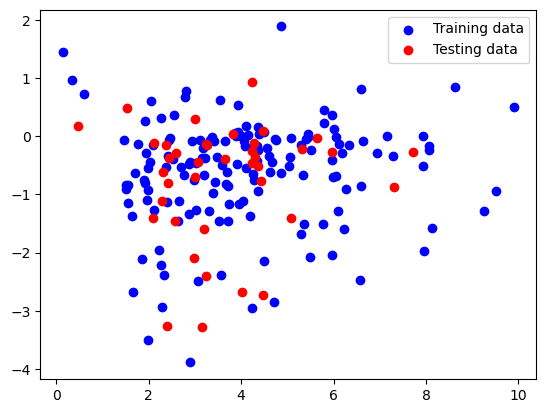

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x_train['Density'], y_train, color='blue', label='Training data')
plt.scatter(x_test['Density'], y_test, color='red', label='Testing data')
plt.legend()
plt.show()

C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

<Figure size 800x800 with 0 Axes>

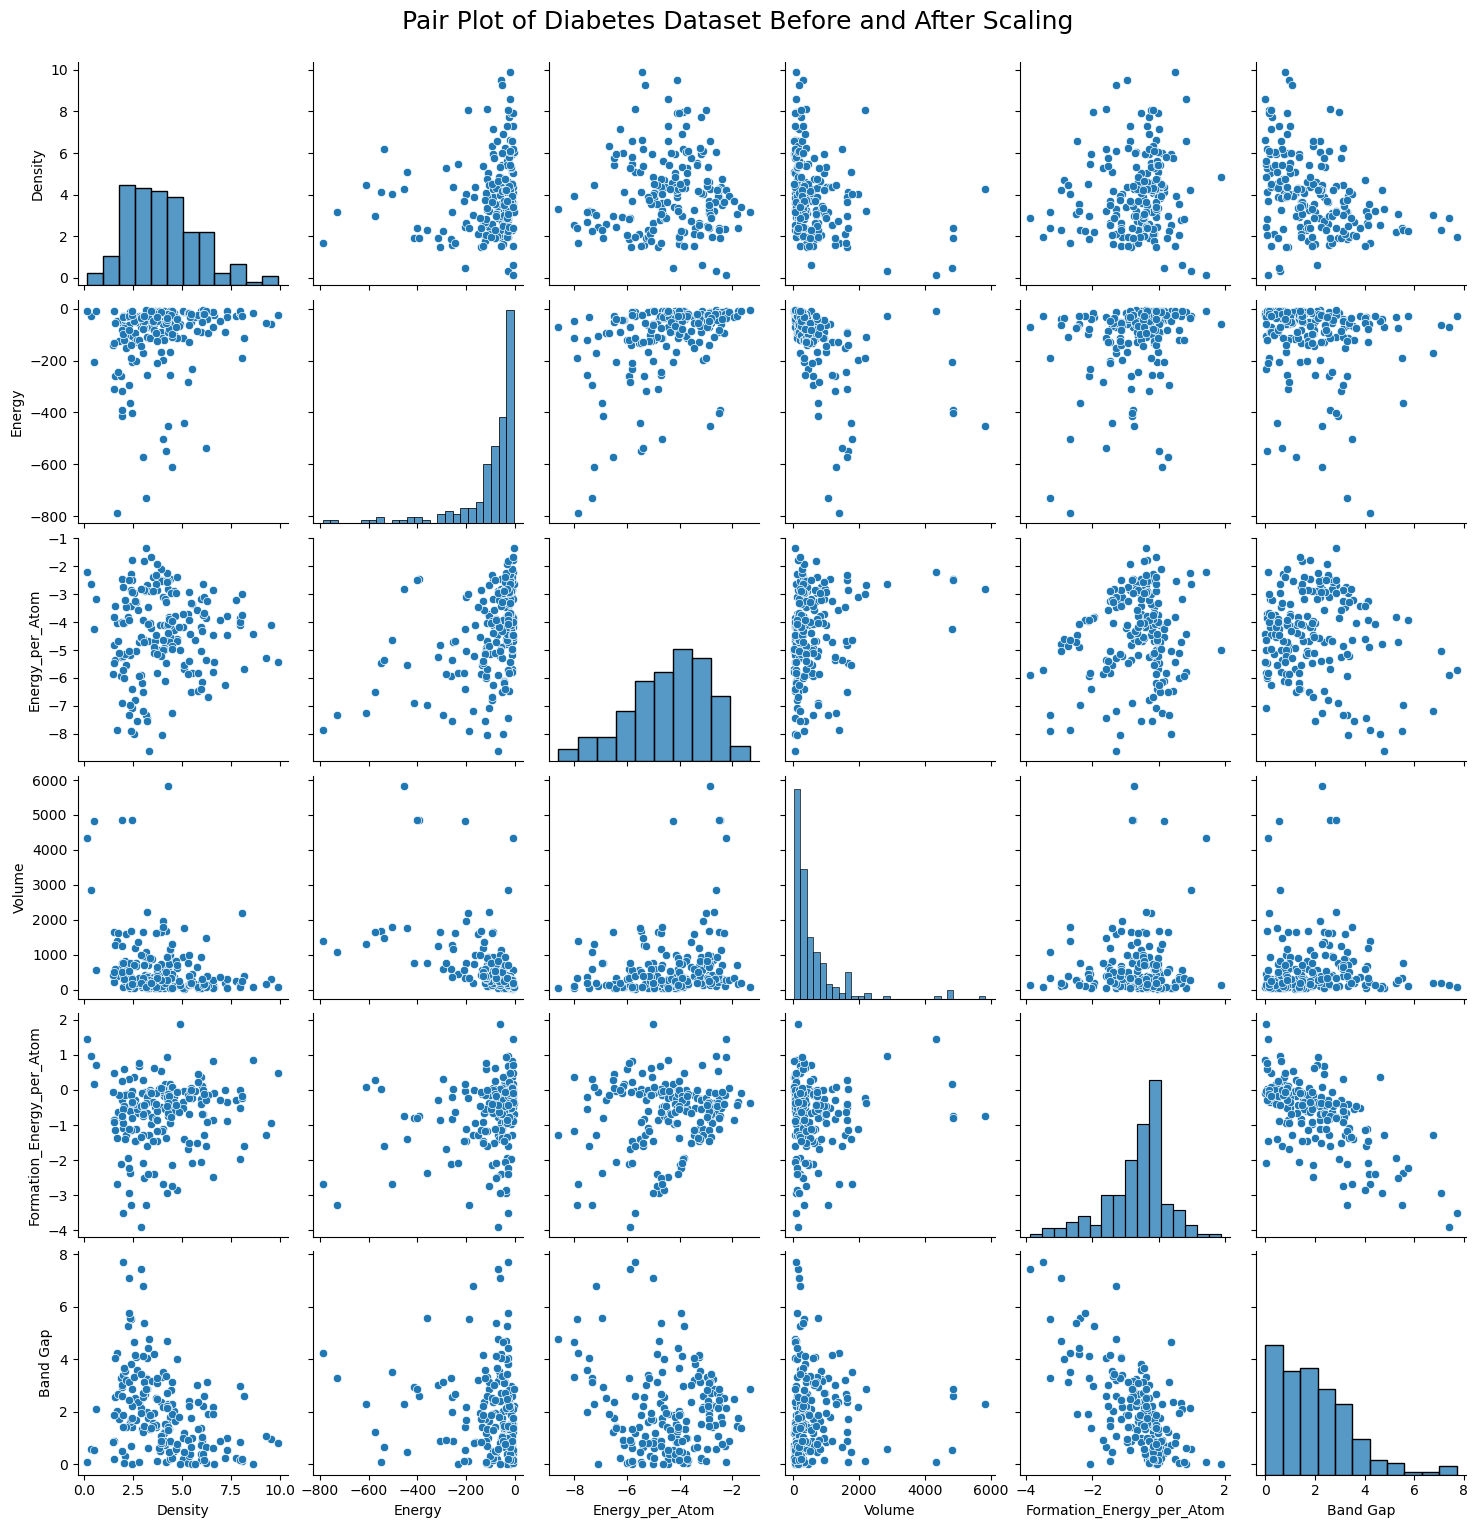

In [12]:
# Visualizing data before and after scaling with a pair plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8));
sns.pairplot(data=df)
plt.suptitle('Pair Plot of Diabetes Dataset Before and After Scaling', y=1.02, fontsize=18);
plt.show();

## ==================================================================================================================
##　Data scaling 
https://www.cupoy.com/collection/0000018008CD5D70000000046375706F795F72656C656173654355/00000181709BCC8F000000056375706F795F72656C656173654349
https://medium.com/@hhuseyincosgun/which-data-scaling-technique-should-i-use-a1615292061e

Normalization (MinMaxScaler) : 
<br>
<img src="https://miro.medium.com/v2/resize:fit:996/format:webp/1*gxth9npBXCrHDYbw9XJGrQ.png" width="20%" height="auto">
<br>

Standardization (Z-Score Standardization) : uses mean and standard deviation
<br>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*mViMXFWPqg7Vg2WwjaoKVQ.png" width="300" height="auto">
<br>

RobustScaler : uses median and interquartile range (IQR) instead
<br>
<img src="https://miro.medium.com/v2/resize:fit:1348/format:webp/1*uoQxqnwptSNabGU_JL3oPA.png" width="30%" height="auto">
<br>


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*y0esOCH8O2NV1c_8iY3ouA.png" width="1200" height="auto">
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/440px-Boxplot_vs_PDF.svg.png" width="600" height="auto">
<br>
InterQuartile Range (四分位距 = 第三四分位數 - 第一四分位數) : 

[link to wiki](https://zh.wikipedia.org/zh-tw/%E5%9B%9B%E5%88%86%E4%BD%8D%E6%95%B0)
<br>

### 中位數的重要性和應用 :
中位數是描述數據集中趨勢的一個非常有用的統計量，特別是當數據集中包含異常值（極端值）時。與平均值相比，中位數不易受到極端值的影響，因此在有異常值的數據集中提供了更穩定的“中心”測量。例如，在房價分析、收入分析等領域，使用中位數可以提供比平均值更真實的市場情況反映，因為這些領域常常受到極高或極低數據點的影響。

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x_train)

# 如果你也想標準化目標變量
# scaler_y = StandardScaler()
# Y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# x_train, x_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=200)


## Build ANN model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
    # Dense(1, input_shape=(1,), activation='linear')
#     Dense(5, input_shape=(x.shape[1],), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(x.shape[1],), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='linear')
])

# Sequential.help

model.compile(optimizer=Adam(learning_rate=0.005), loss='mse')


## Training ANN model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=2)
history = model.fit(x_scaled, y_train, validation_split=0.2, epochs=200, batch_size=2)

Epoch 1/200
62/62 [==============================] - 1s 7ms/step - loss: 1.1545 - val_loss: 0.4385
Epoch 2/200
62/62 [==============================] - 0s 4ms/step - loss: 0.7898 - val_loss: 0.3942
Epoch 3/200
62/62 [==============================] - 0s 3ms/step - loss: 0.6592 - val_loss: 0.4019
Epoch 4/200
62/62 [==============================] - 0s 4ms/step - loss: 0.5853 - val_loss: 0.3120
Epoch 5/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5507 - val_loss: 0.3744
Epoch 6/200
62/62 [==============================] - 0s 4ms/step - loss: 0.5343 - val_loss: 0.3253
Epoch 7/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5597 - val_loss: 0.3540
Epoch 8/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5334 - val_loss: 0.5299
Epoch 9/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5349 - val_loss: 0.3066
Epoch 10/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5219 - val_loss: 0.3125
Epoch 11/

## Model evaluation

In [16]:
history.history['loss'][:10]

[1.154531717300415,
 0.7897896766662598,
 0.6591935753822327,
 0.5853382349014282,
 0.550675630569458,
 0.534281849861145,
 0.5596568584442139,
 0.5334051251411438,
 0.534899115562439,
 0.5219318866729736]

2/2 [==============================] - 0s 6ms/step - loss: 5.8792


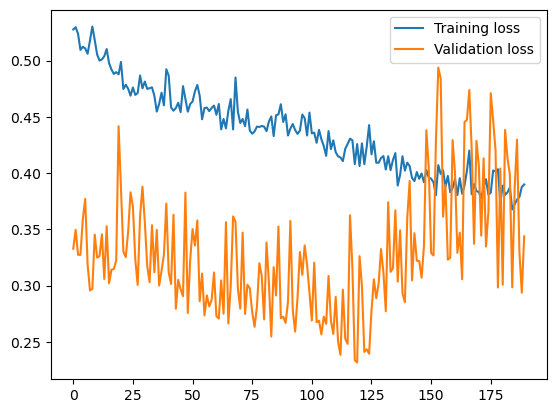

In [17]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 绘制训练历史
plt.plot(history.history['loss'][10:], label='Training loss')
plt.plot(history.history['val_loss'][10:], label='Validation loss')
plt.legend()
plt.show()

2/2 [==============================] - 0s 5ms/step


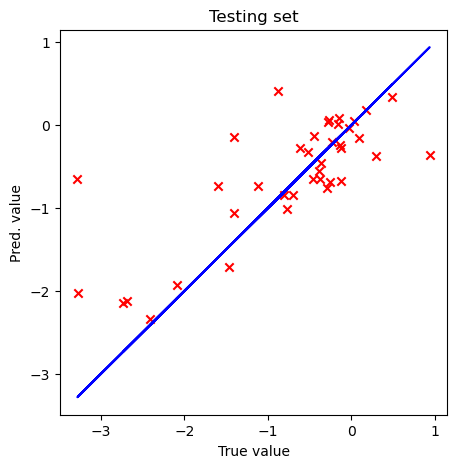

5/5 [==============================] - 0s 3ms/step


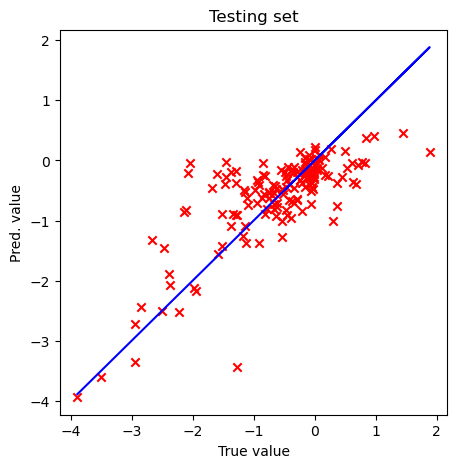

R2=(0.5726299926451037, 0.5599568555261492), Pearson=(0.7598041546567273, 0.7656293082117619) for training and testing sets


In [19]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    

# y_pred = model.predict(x_test)
# plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

# y_pred = model.predict(x_train)
# plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)

def pred(scaler_x, x):
    x_scaled = scaler_x.fit_transform(x)
    return model.predict(x_scaled)
    
from sklearn.metrics import r2_score
## Pearson correlation function
from sklearn.datasets import make_regression
from sklearn.feature_selection import r_regression
# y_pred計算前，input需先sacling。
y_pred = pred(scaler_x, x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)
r2_test = r2_score(y_test, y_pred)
psc_test = r_regression(y_test.to_numpy().reshape(-1, 1) , y_pred.ravel())[0]

y_pred = pred(scaler_x, x_train)
plot_scatter(y_train, y_pred, "Testing set", "True value", "Pred. value",1)
r2_train = r2_score(y_train, y_pred)
psc_train = r_regression(y_train.to_numpy().reshape(-1, 1), y_pred.ravel())[0]

## Pearson correlation function
from sklearn.datasets import make_regression
from sklearn.feature_selection import r_regression


## Coefficient of determination, denoted R2
print(f"R2={r2_train, r2_test}, Pearson={psc_train, psc_test} for training and testing sets")


5/5 [==============================] - 0s 3ms/step


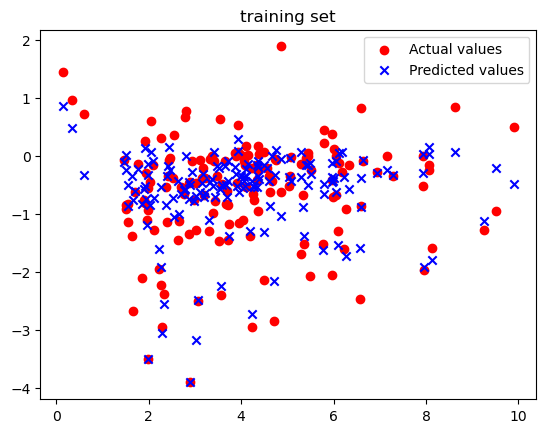

2/2 [==============================] - 0s 4ms/step


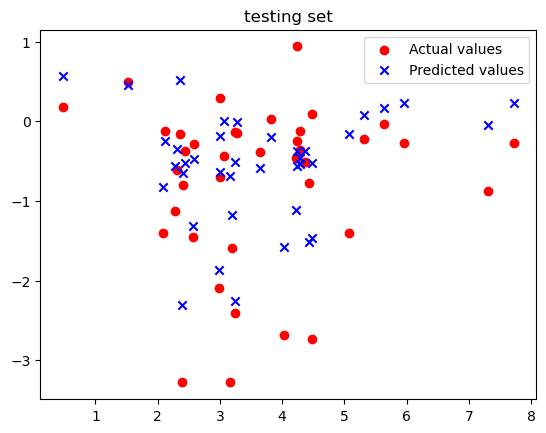

In [79]:
# y_pred計算前，input需先sacling。
# y_pred = model.predict(x_train)
y_pred = pred(scaler_x, x_train)

plt.scatter(x_train['Density'], y_train, color='red', label='Actual values')
plt.scatter(x_train['Density'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()

# y_pred計算前，input需先sacling。
# y_pred = model.predict(x_test)
y_pred = pred(scaler_x, x_test)

plt.scatter(x_test['Density'], y_test, color='red', label='Actual values')
plt.scatter(x_test['Density'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

5/5 [==============================] - 0s 2ms/step


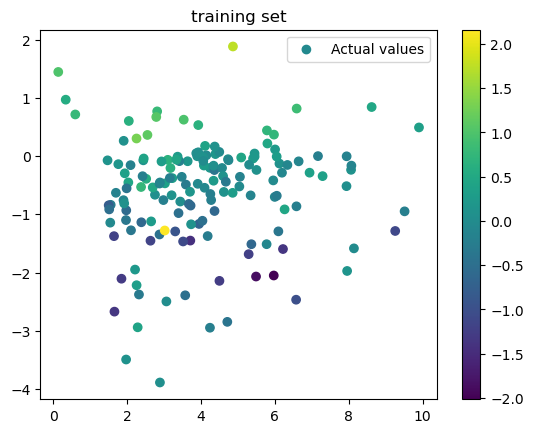

In [34]:
diff = y_train.values.reshape(-1, 1) - pred(scaler_x, x_train)

plt.scatter(x_train['Density'], y_train, c= diff, label='Actual values', cmap='viridis')
plt.title('training set')
plt.legend()
plt.colorbar()
plt.show()

In [35]:
# ## Coefficient of determination, denoted R2
# from sklearn.metrics import r2_score
# y_pred = model.predict(x_test)
# r2_test = r2_score(y_test, y_pred)

# y_pred = model.predict(x_train)
# r2_train = r2_score(y_train, y_pred)

# print(r2_train, r2_test)

5/5 [==============================] - 0s 2ms/step
-0.2401081388470787 -0.26571370296064356


In [36]:
# ## Pearson correlation function
# from sklearn.datasets import make_regression
# from sklearn.feature_selection import r_regression

# y_pred = model.predict(x_test)
# psc_test = r_regression(y_test.to_numpy().reshape(-1, 1) , y_pred.ravel())[0]
# y_pred = model.predict(x_train)
# psc_train = r_regression(y_train.to_numpy().reshape(-1, 1), y_pred.ravel())[0]
# print(psc_test, psc_train)

5/5 [==============================] - 0s 3ms/step
0.26317809109081114 0.4475416492147637
